# Expenditure on research and development by sector, in million euros

https://www.destatis.de/EN/Themes/Society-Environment/Education-Research-Culture/Research-Development/Tables/research-development-sectors.html

# Import Modules

In [1]:
import requests
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

import warnings
import requests
from bs4 import BeautifulSoup

# Options and Settings

In [2]:
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.autolayout'] = True
plt.rcParams['figure.figsize'] = [20, 18]
plt.rcParams['font.size'] = 12
path = os.getcwd()                                                      # get current working directory
warnings.simplefilter('ignore')

# Fetch Data

In [3]:
url = 'https://www.destatis.de/EN/Themes/Society-Environment/Education-Research-Culture/Research-Development/Tables/research-development-sectors.html'

r = requests.get(url)

print(f"Status Code: {r.status_code} -- Content-Type: {r.headers['Content-Type']} -- Encoding: {r.encoding}")

Status Code: 200 -- Content-Type: text/html;charset=utf-8 -- Encoding: utf-8


# Parse HTML Document

In [4]:
soup = BeautifulSoup(r.text, 'html.parser')

# Navigate The Data Structure

In [5]:
tbody = soup.find('tbody')
trs = tbody.find_all('tr')

year = []
govprivsec = []
highedusec = []
busentsec = []
total = []


for tr in trs:
  year.append(tr.findAll('td', rowspan=1)[0].string)
  govprivsec.append(tr.findAll('td', rowspan=1)[1].string)
  highedusec.append(tr.findAll('td', rowspan=1)[2].string) 
  busentsec.append(tr.findAll('td', rowspan=1)[3].string) 
  total.append(tr.findAll('td', rowspan=1)[4].string) 

# Create Dataframe

In [6]:
data = {
    'ReferenceYear': year,
    'GovernmentPrivateNonProfitSector': govprivsec,
    'HigherEducationSector': highedusec,
    'BusinessEnterpriseSector': busentsec,
    'Total': total
}

df = pd.DataFrame(data=data)

# Head and Tail

In [7]:
df

,ReferenceYear,GovernmentPrivateNonProfitSector,HigherEducationSector,BusinessEnterpriseSector,Total
0,2010,"10,354","12,731","46,929","70,014"
1,2011,"10,974","13,518","51,077","75,569"
2,2012,"11,341","13,980","53,790","79,110"
3,2013,"11,862","14,302","53,566","79,729"
4,2014,"12,320","14,931","56,996","84,247"
5,2015,"12,486","15,344","60,952","88,782"
6,2016,"12,721","16,627","62,826","92,174"
7,2017,"13,484","17,282","68,787","99,554"
8,2018,"14,168","18,400","72,101","104,669"
9,2019,"15,022","19,173","75,830","110,025"


In [8]:
df.shape

(11, 5)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 5 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   ReferenceYear                     11 non-null     object
 1   GovernmentPrivateNonProfitSector  11 non-null     object
 2   HigherEducationSector             11 non-null     object
 3   BusinessEnterpriseSector          11 non-null     object
 4   Total                             11 non-null     object
dtypes: object(5)
memory usage: 568.0+ bytes


In [10]:
df = df.applymap(lambda x: str.strip(x).replace(',', ''))               # strip whitespaces and replace commas with nothing
df

,ReferenceYear,GovernmentPrivateNonProfitSector,HigherEducationSector,BusinessEnterpriseSector,Total
0,2010,10354,12731,46929,70014
1,2011,10974,13518,51077,75569
2,2012,11341,13980,53790,79110
3,2013,11862,14302,53566,79729
4,2014,12320,14931,56996,84247
5,2015,12486,15344,60952,88782
6,2016,12721,16627,62826,92174
7,2017,13484,17282,68787,99554
8,2018,14168,18400,72101,104669
9,2019,15022,19173,75830,110025


In [11]:
df = df.astype(
  {
    'GovernmentPrivateNonProfitSector': np.int64,
    'HigherEducationSector': np.int64,
    'BusinessEnterpriseSector':	np.int64,
    'Total': np.int64
  }
)

df.dtypes

ReferenceYear                       object
GovernmentPrivateNonProfitSector     int64
HigherEducationSector                int64
BusinessEnterpriseSector             int64
Total                                int64
dtype: object

In [12]:
df.describe(include='object')

,ReferenceYear
count,11
unique,11
top,2010
freq,1


In [13]:
df.drop(columns=['ReferenceYear']).describe()

,GovernmentPrivateNonProfitSector,HigherEducationSector,BusinessEnterpriseSector,Total
count,11.000000,11.000000,11.000000,11.00000
mean,12756.454545,15959.272727,61262.363636,89978.00000
std,1664.186910,2321.280211,9626.828837,13530.97672
min,10354.000000,12731.000000,46929.000000,70014.00000
25%,11601.500000,14141.000000,53678.000000,79419.50000
50%,12486.000000,15344.000000,60952.000000,88782.00000
75%,13826.000000,17841.000000,69909.500000,102111.50000
max,15589.000000,19264.000000,75830.000000,110025.00000


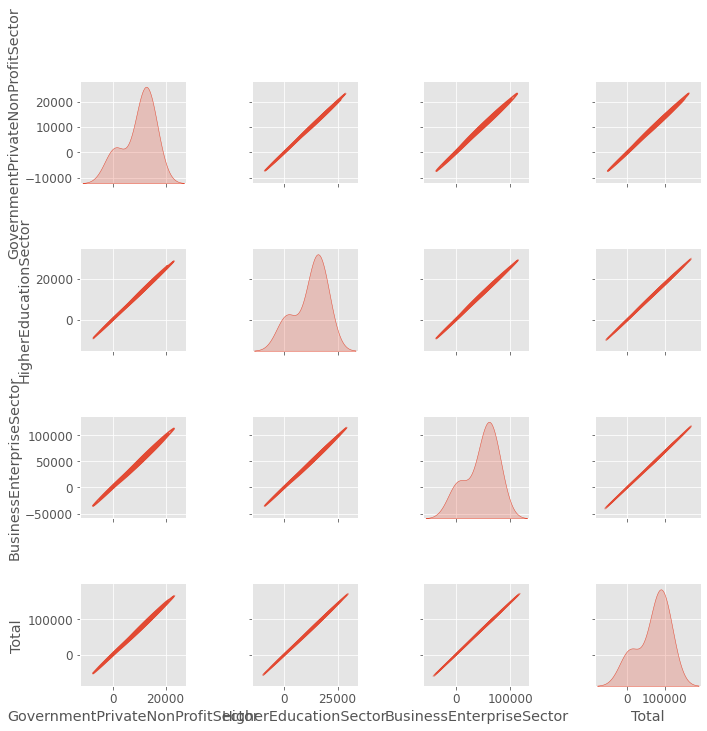

In [14]:
sns.pairplot(df.drop(columns=['ReferenceYear']).describe(), kind='kde')

# Data Visualization

In [15]:
from matplotlib.ticker import FuncFormatter

# helper function to format y-axis
def million(x, pos):
  return ' €%1.1fM' % (x * 1e-3)

format_mill = FuncFormatter(million)

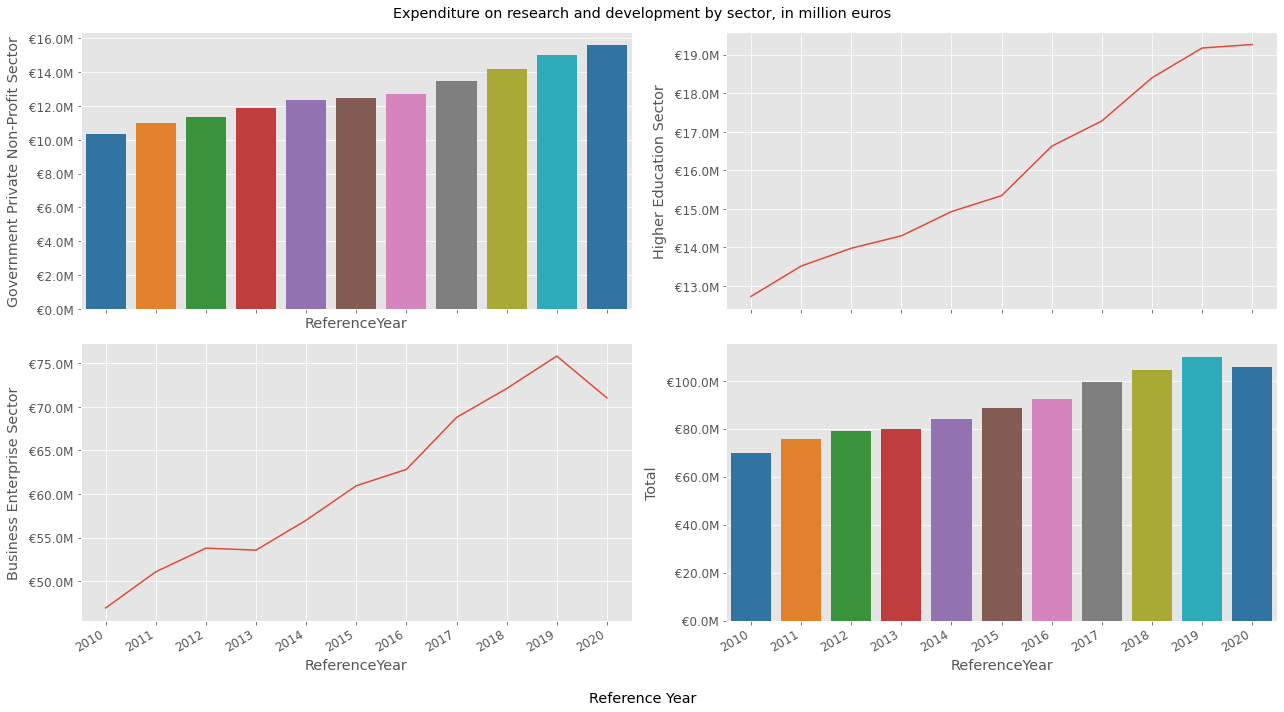

In [16]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(18, 10), sharex=True)
fig.autofmt_xdate()
fig.suptitle('Expenditure on research and development by sector, in million euros')
fig.supxlabel('Reference Year')

sns.barplot(
  data=df,
  x='ReferenceYear', y='GovernmentPrivateNonProfitSector',
  palette='tab10',
  ax=ax1
)

ax1.set(ylabel='Government Private Non-Profit Sector')


sns.lineplot(
  data=df,
  x='ReferenceYear', y='HigherEducationSector',
  ax=ax2
)

ax2.set(ylabel='Higher Education Sector')

sns.lineplot(
  data=df,
  x='ReferenceYear', y='BusinessEnterpriseSector',
  ax=ax3
)

ax3.set(ylabel='Business Enterprise Sector')

sns.barplot(
  data=df,
  x='ReferenceYear', y='Total',
  palette='tab10',
  ax=ax4
)

ax4.set(ylabel='Total')

# set y-axis formatter
for axs in ax1, ax2, ax3, ax4:
  axs.yaxis.set_major_formatter(format_mill)